# Exploratory Data Analysis

## Notebook Summary
In this notebook, I summarize where the data came from and some of its methodologies, and I look through some key columns in the dataset. I also explore important statistics for the project as a whole moving forward, and specifically examine distributions of various columns and how they relate to the target column.

## Data Source and Methodologies
The NSCH is a household survey that produces national and state-level data on the physical and emotional health of children 0 - 17 years old in the United States. Since 2016, the NSCH has been an annual survey. The survey supports national estimates every year and state-level estimates by combining 2 or 3 years of data. In this project I am looking at the 2020 data.

The survey collects information related to the health and well-being of children, including access to and use of health care, family interactions, parental health, school and after-school experiences, and neighborhood characteristics. A parent or other adult caregiver with knowledge of the sampled child’s health and health care filled out the topical questionnaire.

Survey topics include:
- Child and family characteristics
- **Physical and mental health status, including current conditions and functional difficulties**
- Health insurance status, type, and adequacy
- Access and use of health care services
- Medical, dental, and specialty care needed and received
- Family health and activities
- Impact of child’s health on family
- Neighborhood characteristics

Please see [this document](https://www2.census.gov/programs-surveys/nsch/technical-documentation/methodology/2020-NSCH-Methodology-Report.pdf) for a full report on the methodologies used by the US Census Bureau when obtaining this data.

## Loading and Exploring the Data
Lets first load and explore the data, and confirm its size and shape.

In [1]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
# Loading data into pandas dateframe
nsch = pd.read_sas('../Data/nsch_2020_topical_SAS/nsch_2020_topical.sas7bdat')

# Visually checking successful loading of dataframe
nsch.head()

/Users/matthewturner/opt/anaconda3/envs/Capstone/lib/python3.9/site-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,BIRTH_YR_F,BMICLASS,HHCOUNT_IF,FPL_I1,FPL_I2,FPL_I3,FPL_I4,FPL_I5,FPL_I6,FWC
0,b'17',b'1',b'20000003',b'T1',2.0,1.0,1.0,3.0,1.0,NaN,...,0.0,NaN,0.0,400.0,400.0,400.0,400.0,400.0,400.0,3296.080092
1,b'29',b'2A',b'20000004',b'T3',1.0,1.0,1.0,14.0,2.0,NaN,...,0.0,2.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,2888.545330
2,b'47',b'1',b'20000005',b'T1',1.0,1.0,1.0,1.0,2.0,NaN,...,0.0,NaN,0.0,400.0,400.0,400.0,400.0,400.0,400.0,1016.682730
3,b'28',b'1',b'20000014',b'T3',2.0,1.0,1.0,15.0,2.0,NaN,...,0.0,2.0,0.0,143.0,143.0,143.0,143.0,143.0,143.0,1042.091065
4,b'55',b'1',b'20000015',b'T3',2.0,2.0,1.0,16.0,2.0,NaN,...,0.0,3.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,402.372392


### Shape

In [3]:
# Getting shape of data frame and assigning to variables
total_rows, total_columns = nsch.shape

print(f'There are {total_rows} completed surveys')
print(f'There are {total_columns} questions in the survey')

There are 42777 completed surveys
There are 443 questions in the survey


The [Methodology Report](https://www2.census.gov/programs-surveys/nsch/technical-documentation/methodology/2020-NSCH-Methodology-Report.pdf) for this survey states that they ***reached out to 240,000 house holds, and 93,000 completed a screener survey**.

They also state that **of those 93,000 households, 51,107 are included in the public use file**, however, of the 51,107 households **only 42,777 submitted a complete survey**. So our numbers match up with what is in the report.

Lets get quick overview of the data before moving on

### Data Types

In [4]:
# Data Types in set
nsch.dtypes.value_counts()

float64    439
object       4
dtype: int64

Though most of these are floats, it is important to remember that this entire dataset is categorical data due to it being a survey.

In [5]:
# Checking for NaN values
nsch.isna().sum().head(10)

FIPSST                0
STRATUM               0
HHID                  0
FORMTYPE              0
TOTKIDS_R             0
TENURE                0
HHLANGUAGE          154
SC_AGE_YEARS          0
SC_SEX                0
K2Q35A_1_YEARS    41619
dtype: int64

In [6]:
# Printing the total amount of NAN values in the data frame
print(f'There are a total of {nsch.isna().sum().sum()} missing values in this data set.')

There are a total of 7658203 missing values in this data set.


It is clear that there are a significant amount of missing values in this set, all of which will have to be dealt with for the modeling process. This can be dealt with when we begin data cleaning. For now, lets move onto visualizing our target and the relationships it has with other questions in the survey.


# ADHD

Our target column for prediction will be "K2Q31A", which says:


> "Has a doctor or other health care provider EVER told you that this child has Attention Deficit Disorder or Attention-Deficit/Hyperactivity Disorder, that is, ADD or ADHD?"

Lets visualize its distribution.

90% of kids in this sample have not been diagnosed ADHD.
10% of kids in this sample have been diagnosed ADHD.


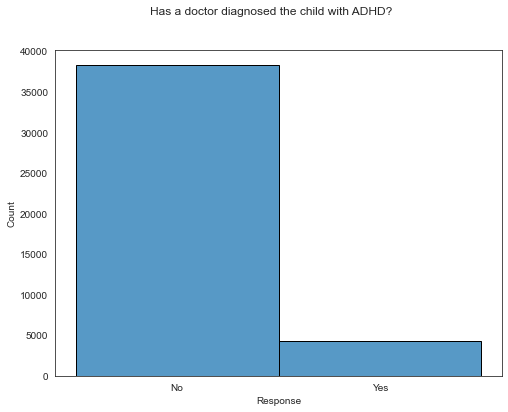

In [7]:
# Replacing numbers with words for easier plotting
adhd_yn = nsch['K2Q31A'].replace({1: 'Yes', 2: 'No'})

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(adhd_yn, ax=ax, edgecolor='black')
plt.suptitle('Has a doctor diagnosed the child with ADHD?')
plt.xlabel('Response');

# Printing out numbers

# Percentages of kids with ADHD
no_adhd_p, yes_adhd_p = adhd_yn.value_counts(normalize=True)

print(f'{no_adhd_p*100:.0f}% of kids in this sample have not been diagnosed ADHD.')
print(f'{yes_adhd_p*100:.0f}% of kids in this sample have been diagnosed ADHD.')


In [8]:
no_adhd, yes_adhd = adhd_yn.value_counts()
print(f'There are {yes_adhd} kids out of {total_rows} in this sample that have been diagnosed with ADHD')
print(f'{no_adhd} out of {total_rows} kids in this sample have not been diagnosed with ADHD, leaving {total_rows-(yes_adhd+no_adhd)} NaN responses')

There are 4306 kids out of 42777 in this sample that have been diagnosed with ADHD
38283 out of 42777 kids in this sample have not been diagnosed with ADHD, leaving 188 NaN responses


### Analysis
It is hard to try and compare this to an overall estimate of ADHD among the overall population, since most studies use this survey as a basis for estimation. It is important to note that kids with special health care needs have been super-sampled when the data was collected. The actual population of kids diagnosed with ADHD, most likely, does not look like this. We have an incredibly small amount of kida actually diagnosed with ADHD, and this lack of data may prove a challenge later when modeling.

Now that we have this information, let's look into these 4306 kids and look at some relationships between other columns

# ADHD Diagnoses and Gender
Lets investigate the relationship between a child's sex and ADHD diagnoses

/var/folders/y8/vq429chs6djb0hl0y0zp5fg00000gn/T/ipykernel_33324/1735789194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['SC_SEX'] = adhd_df['SC_SEX'].replace({1: 'Male', 2: 'Female'})


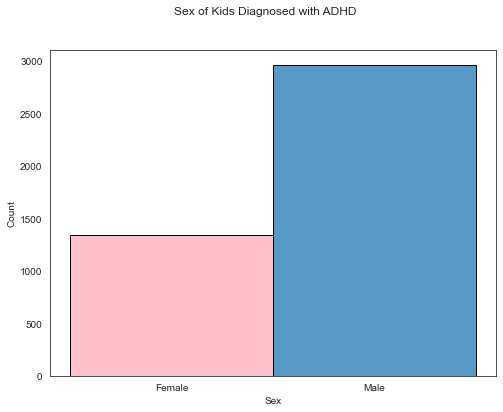

In [33]:
# Grab a dataframe with only ADHD diagnosed kids
adhd_df = nsch[nsch['K2Q31A'] == 1]

# Replace numbers with "Male" and "Female" for easier plotting
adhd_df['SC_SEX'] = adhd_df['SC_SEX'].replace({1: 'Male', 2: 'Female'})

# Plotting
sex_fig, sex_ax = plt.subplots(figsize=(8, 6))
sns.histplot(adhd_df['SC_SEX'], ax=sex_ax, edgecolor='black')
plt.suptitle('Sex of Kids Diagnosed with ADHD')
plt.xlabel('Sex');

# Setting color of "female" bar manually
sex_ax.patches[0].set_color('pink')
sex_ax.patches[0].set_edgecolor('black')


In [39]:
# Get normalized value counts of Sex
male_p, female_p = adhd_df['SC_SEX'].value_counts(normalize=True)

# Print percentages rounded to the nearest whole number.
print(f' Of all the kids with ADHD in our sample {male_p*100:.0f}% are male, and {female_p*100:.0f}% are female')

 Of all the kids with ADHD in our sample 69% are male, and 31% are female
